# 1. Library loading

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Set matplotlib to display plots inline
%matplotlib inline

# Suppress warnings
warnings.filterwarnings(action='ignore')

# Statistical libraries
from scipy import stats

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.stats import pearsonr
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge

In [2]:
df_O2= pd.read_csv("/content/drive/MyDrive/deep_learning/Projects/Project2-CNN/P3/CO2 Emissions_Canada.csv")

In [3]:
type(df_O2)

pandas.core.frame.DataFrame

# 2. Data Cleaning

In [4]:
df_O2.shape


(7385, 12)

In [5]:
df_O2.shape


(7385, 12)

In [3]:
df_O2.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [4]:
renamed_columns = {
    'Make': 'Make',
    'Model': 'Model',
    'Vehicle Class': 'Vehicle_Class',
    'Engine Size(L)': 'Engine_Size(L)',
    'Cylinders': 'Cylinders',
    'Transmission': 'Transmission',
    'Fuel Type': 'Fuel_Type',
    'Fuel Consumption City (L/100 km)': 'Fuel_Consumption_City(L/100 km)',
    'Fuel Consumption Hwy (L/100 km)': 'Fuel_Consumption_Hwy(L/100 km)',
    'Fuel Consumption Comb (L/100 km)': 'Fuel_Consumption_Comb(L/100 km)',
    'Fuel Consumption Comb (mpg)': 'Fuel_Consumption_Comb(mpg)',
    'CO2 Emissions(g/km)': 'CO2_Emissions'
}

In [7]:
df_O2.describe()


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
# Descriptive Statistics
summary_statistics = df_O2.describe()
print(summary_statistics)

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                           4.000000         

In [8]:
# Check for missing values in df_O2
missing_values = df_O2.isnull().sum()

# Print the missing values count
print("Missing Values:\n", missing_values)

Missing Values:
 Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [9]:
df_O2.nunique()

Make                                  42
Model                               2053
Vehicle Class                         16
Engine Size(L)                        51
Cylinders                              8
Transmission                          27
Fuel Type                              5
Fuel Consumption City (L/100 km)     211
Fuel Consumption Hwy (L/100 km)      143
Fuel Consumption Comb (L/100 km)     181
Fuel Consumption Comb (mpg)           54
CO2 Emissions(g/km)                  331
dtype: int64

In [10]:
# Drop all duplicates data
df_O2.drop_duplicates(inplace=True)

#Checking to confirm if the duplicates have been removed
df_O2.duplicated().sum()

0

In [11]:
df_O2.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


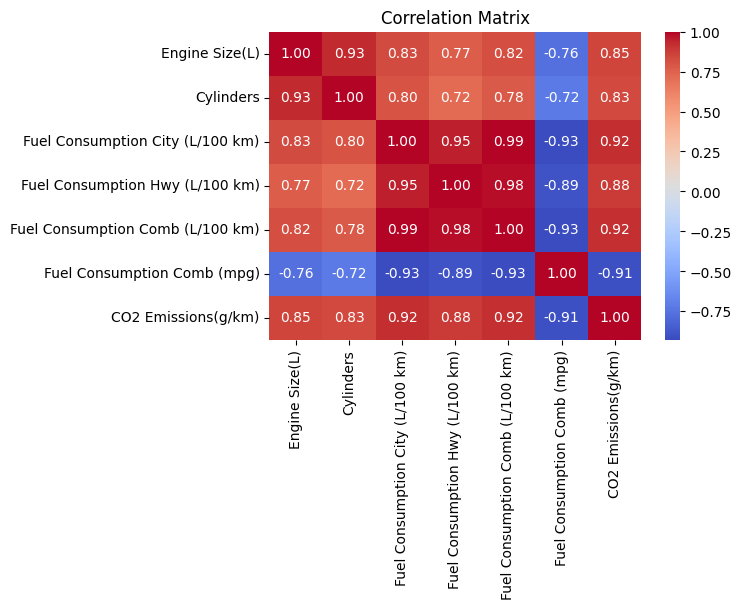

In [81]:
# Correlation Analysis using only numeric values
numeric_df_O2 = df_O2.select_dtypes(include=[np.number])  # Select only numeric columns
correlation_matrix = numeric_df_O2.corr()  # Calculate correlation matrix

# Plot the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

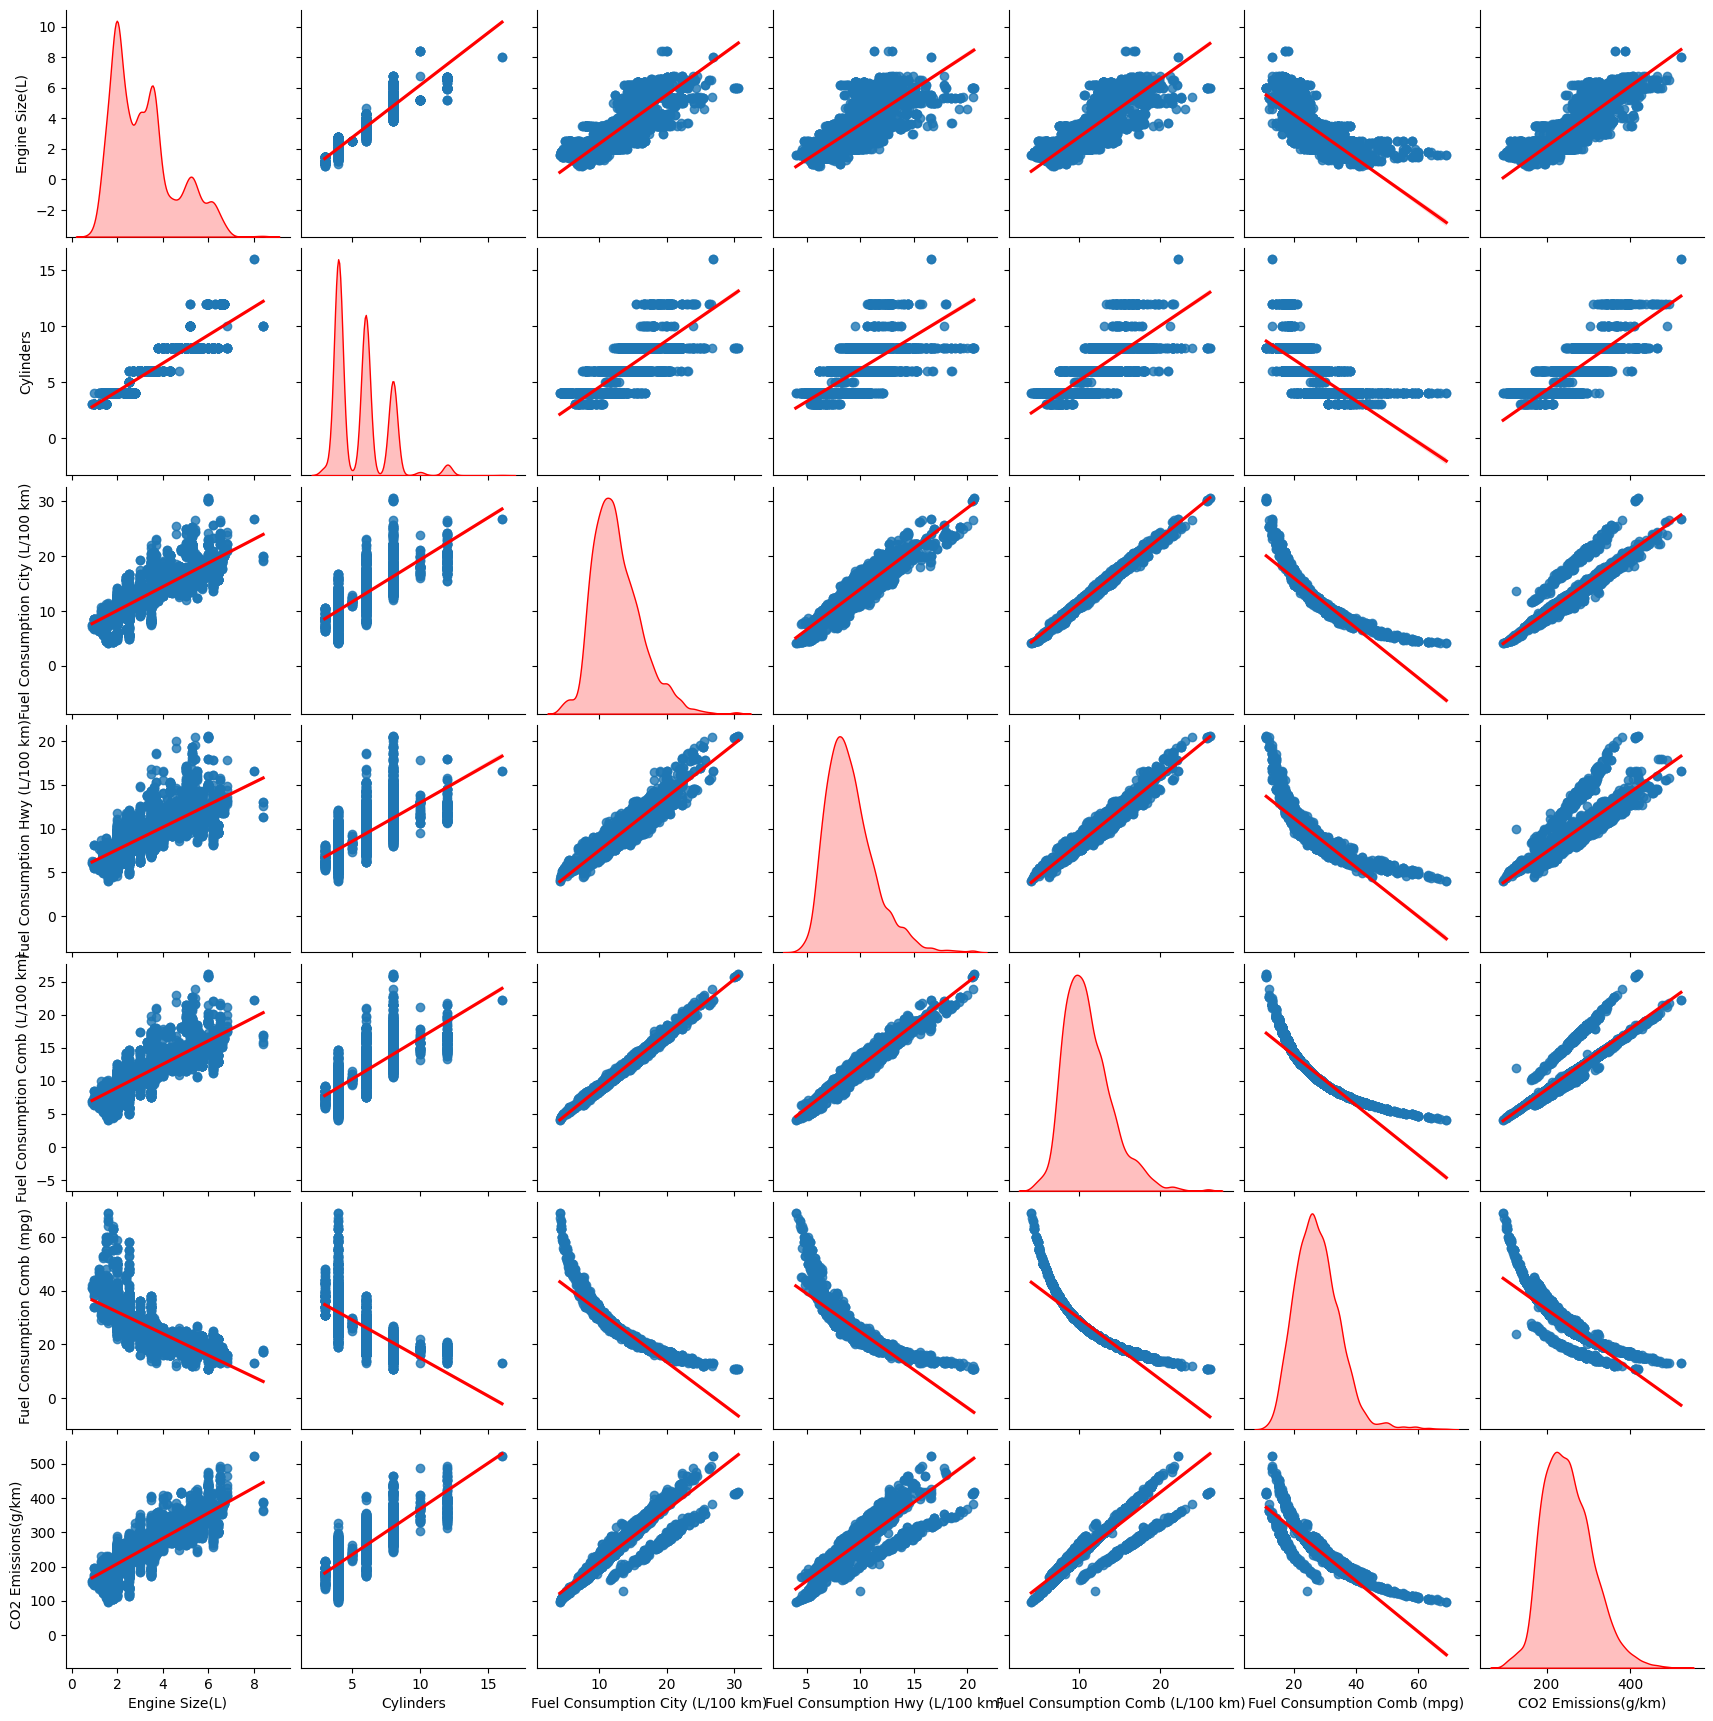

In [82]:
# Changing the detafrme for EDA
df_CO2 = df_O2.copy()


# sns.pairplot(df_CO2,hue='Make')

sns.pairplot(df_CO2, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

The correlation matrix provides insights into the relationships between various aspects of vehicle performance and environmental impact:

### Strong Positive Correlations:

* Engine Size & Cylinders: Larger engines tend to have more cylinders (0.93 correlation).
* Engine Size & Fuel Consumption:  Larger engines generally consume more fuel in the city, highway, and combined (0.83, 0.77, 0.82 correlations).
* Engine Size & CO2 Emissions: Larger engines produce more CO2 emissions (0.85 correlation).
* City & Highway Fuel Consumption:  Fuel consumption in the city is highly correlated with highway consumption (0.95), suggesting consistent driving habits or vehicle efficiency across different conditions.
* Fuel Consumption (L/100km) & CO2 Emissions:  Higher fuel consumption directly leads to higher CO2 emissions (0.92 correlation).

### Strong Negative Correlations:

* Fuel Consumption (mpg) & Fuel Consumption (L/100km): This is expected as mpg (miles per gallon) is the inverse of L/100km (liters per 100 kilometers). The -0.93 correlation reflects this inverse relationship.
* Fuel Consumption (mpg) & CO2 Emissions:  Higher fuel efficiency (mpg) results in lower CO2 emissions (-0.91 correlation).

### Moderate Correlations:

* Cylinders & Fuel Consumption: The number of cylinders has a moderate correlation with fuel consumption (around 0.80 for city and combined, 0.72 for highway).
* Cylinders & CO2 Emissions: The number of cylinders is moderately correlated with CO2 emissions (0.83).

## Key Takeaways:

* Engine Size is a Major Factor: The size of the engine is the most influential factor in fuel consumption and CO2 emissions. Larger engines consume more fuel and produce more emissions.
* Fuel Efficiency Matters:  Improving fuel efficiency is crucial for reducing both fuel consumption and CO2 emissions.
* City vs. Highway Driving: There's a strong correlation between city and highway fuel consumption, suggesting that vehicles tend to have consistent efficiency across both types of driving.

### Additional Considerations:

* This correlation matrix doesn't imply causation. While the relationships are strong, other factors not included in the analysis could also play a role.
* The data used to generate this matrix may be specific to a particular set of vehicles or driving conditions. Results might vary for different types of vehicles or driving patterns.


# 3. EDA

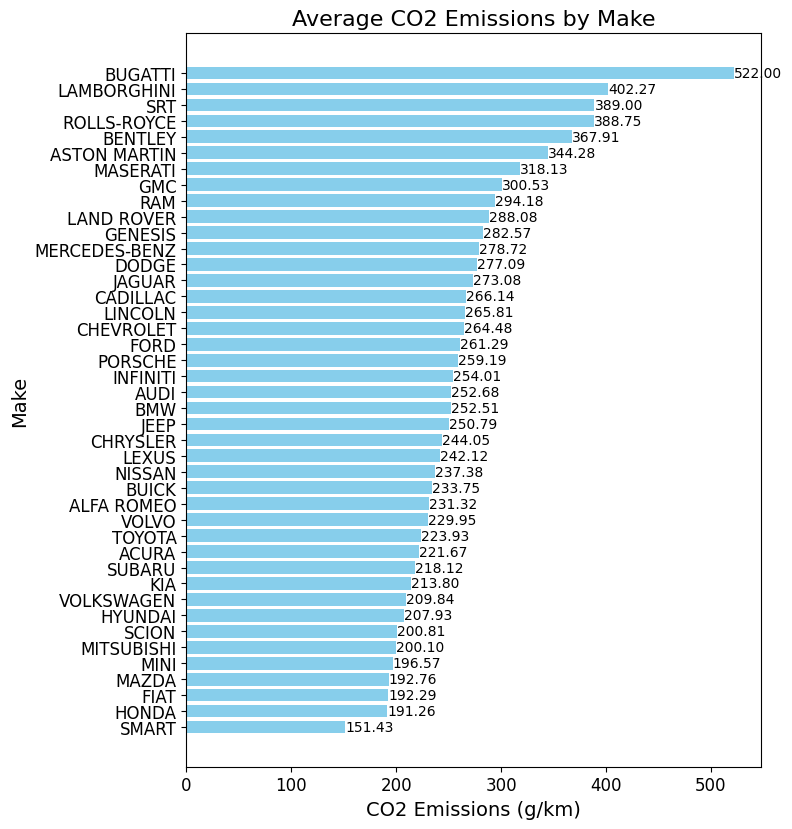

In [83]:
# Get unique makes
makes = df_CO2['Make'].unique()

# Calculate mean CO2 emissions for each make
co2_means = []
for make in makes:
    co2_means.append(df_CO2[df_CO2['Make'] == make]['CO2 Emissions(g/km)'].mean())

# Sort the makes and means in ascending order
sorted_indices = np.argsort(co2_means)
makes = makes[sorted_indices]
co2_means = [co2_means[i] for i in sorted_indices]



# Calculate the required figure height based on the number of unique makes
num_makes = len(makes)
fig_height = max(1, num_makes * 0.2)  # Minimum height of 6 inches

# Create a horizontal bar plot with dynamic figure size
plt.figure(figsize=(8, fig_height))
bars = plt.barh(makes, co2_means, color='skyblue')
plt.title('Average CO2 Emissions by Make', fontsize=16)
plt.xlabel('CO2 Emissions (g/km)', fontsize=14)
plt.ylabel('Make', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()

the average CO2 emissions (g/km) for various car manufacturers. Here are some key insights:

### High Emitters:

* Luxury and performance brands like Bugatti, Lamborghini, Rolls-Royce, Bentley, and Aston Martin have the highest CO2 emissions, exceeding 300 g/km. This is likely due to their powerful engines and focus on performance over efficiency.

### Mid-Range Emitters:

* Many popular brands like Mercedes-Benz, BMW, Audi, Land Rover, Lexus, and others fall in the mid-range, with emissions between 200-300 g/km. This reflects a mix of engine types and vehicle sizes, including both larger SUVs and more efficient models.

### Lower Emitters:

* Several mainstream brands like Toyota, Honda, Hyundai, Kia, and Volkswagen have lower emissions, often below 200 g/km. These manufacturers offer a wider range of fuel-efficient vehicles, including hybrids and smaller cars.
* Notably, Smart has the lowest emissions on the chart, likely due to its focus on small, efficient city cars.

### Additional Considerations:

* This chart provides a snapshot of average emissions, but actual emissions can vary significantly depending on the specific model, driving conditions, and individual driving habits.
* CO2 emissions are just one aspect of a vehicle's environmental impact. Other factors like manufacturing processes and end-of-life disposal also play a role.

Overall, this chart highlights the wide range of CO2 emissions across different car brands and the importance of considering emissions when choosing a vehicle.


In [78]:
# Assigning the correlated variables to numerical_vars for visuals
numerical_vars =['Cylinders',
                               'Fuel_Consumption_City(L/100 km)',
                               'Fuel_Consumption_Hwy(L/100 km)',
                               'Fuel_Consumption_Comb(L/100 km)',
                               'CO2_Emissions(g/km)']

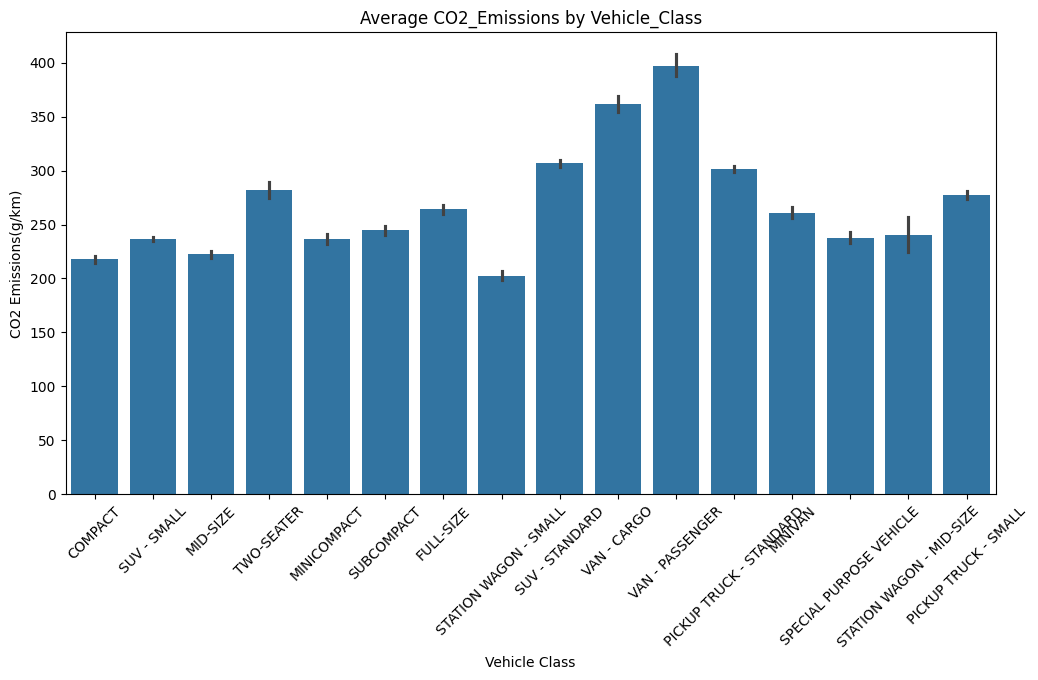

In [28]:
# Comparison of Vehicle Classes
plt.figure(figsize=(12, 6))
sns.barplot(data=df_CO2, x='Vehicle Class', y='CO2 Emissions(g/km)')
plt.title('Average CO2_Emissions by Vehicle_Class')
plt.xticks(rotation=45)
plt.show()

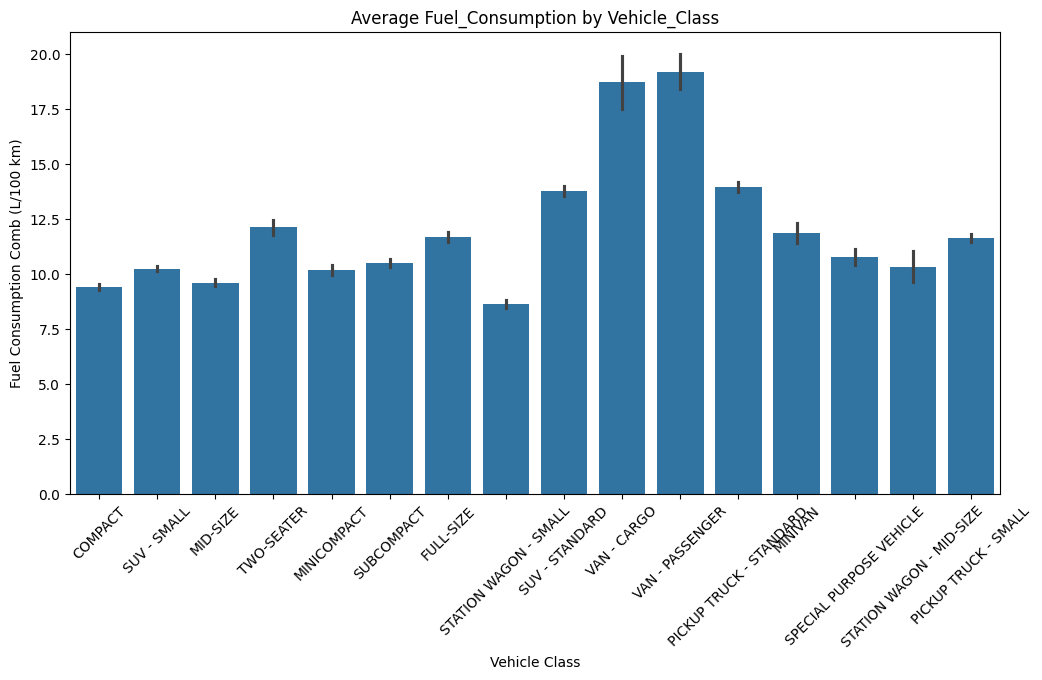

In [77]:
# Comparison of the average fuel consumption
plt.figure(figsize=(12, 6))
sns.barplot(data=df_CO2, x='Vehicle Class', y='Fuel Consumption Comb (L/100 km)')
plt.title('Average Fuel_Consumption by Vehicle_Class')
plt.xticks(rotation=45)
plt.show()

The bar chart displays the average combined fuel consumption (in liters per 100 kilometers) for various vehicle classes. Here are some key insights:

### Highest Fuel Consumption:

* Pickup trucks (both standard and small) have the highest average fuel consumption, exceeding 17 L/100km and 11 L/100km respectively.
* Vans (both passenger and cargo) also exhibit high fuel consumption, ranging from 14-19 L/100km.
* SUVs (both standard and small) have moderately high consumption, around 12-14 L/100km.

### Lowest Fuel Consumption:

* Two-seaters are the most fuel-efficient, consuming only around 7 L/100km on average.
* Compact and subcompact cars also have relatively low consumption, ranging from 9-10 L/100km.

### Mid-Range Consumption:

* **Mid-size** cars, **minicompact** cars, and **station wagons** (both small and mid-size) fall in the middle range, with fuel consumption between 10-12 L/100km.


#### This chart provides a general overview of the fuel efficiency of different vehicle classes. It highlights the higher consumption of larger vehicles like trucks and vans, and the relative efficiency of smaller cars and two-seaters. This information can be useful for consumers when choosing a vehicle, considering their needs and priorities regarding fuel efficiency and environmental impact.


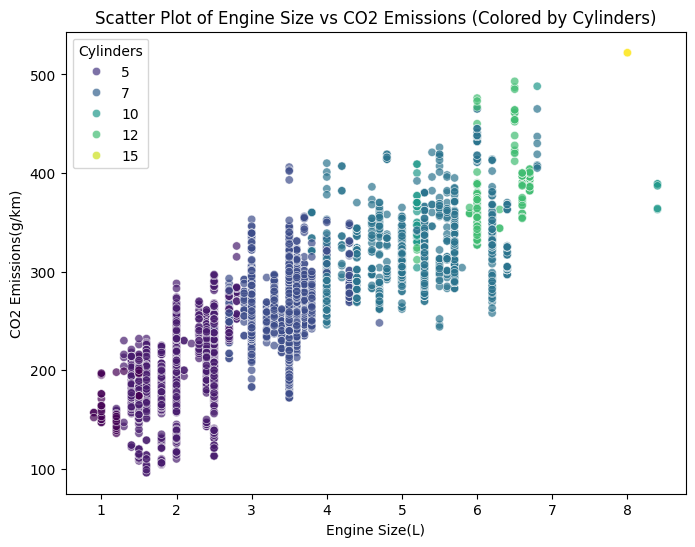

In [79]:
# Analysis of Engine Size and Cylinders
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_CO2, x='Engine Size(L)', y='CO2 Emissions(g/km)', hue='Cylinders', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Engine Size vs CO2 Emissions (Colored by Cylinders)')
plt.xlabel('Engine Size(L)')
plt.ylabel('CO2 Emissions(g/km)')
plt.show()

### Overall:
- This scatter plot provides valuable insights into the relationship between engine size, cylinders, and CO2 emissions.
- It highlights the importance of considering all these factors when evaluating a vehicle's environmental impact.

In [80]:
# Define a function to remove outliers using z-score method
def remove_outliers_zscore(df_CO2, columns, threshold=3):
    z_scores = stats.zscore(df_CO2[columns])
    abs_z_scores = np.abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    df_CO2_cleaned = df_CO2[filtered_entries]
    return df_CO2_cleaned

# Define columns for outlier removal
columns_for_outlier_removal = ['Engine Size(L)', 'Cylinders',
                               'Fuel Consumption City (L/100 km)',
                               'Fuel Consumption Hwy (L/100 km)',
                               'Fuel Consumption Comb (L/100 km)',
                               'CO2 Emissions(g/km)']

# Remove outliers
df_CO2_cleaned = remove_outliers_zscore(df_CO2, columns_for_outlier_removal)

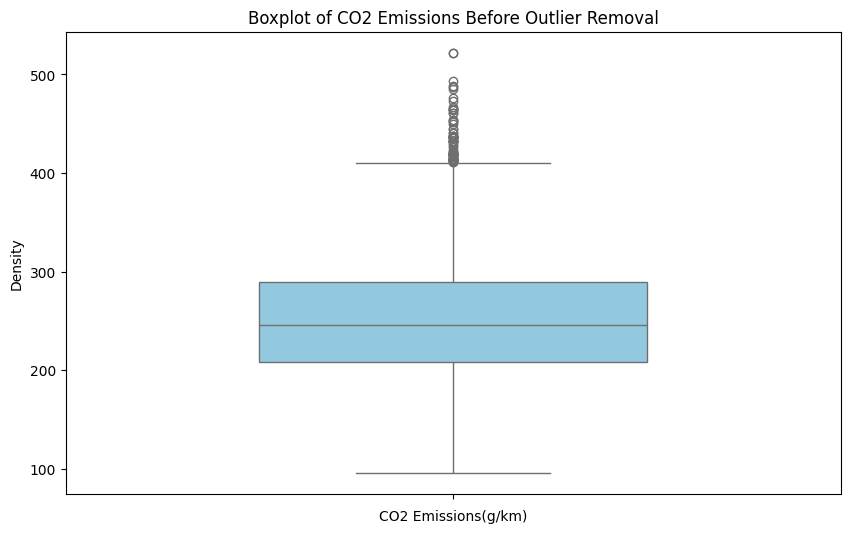

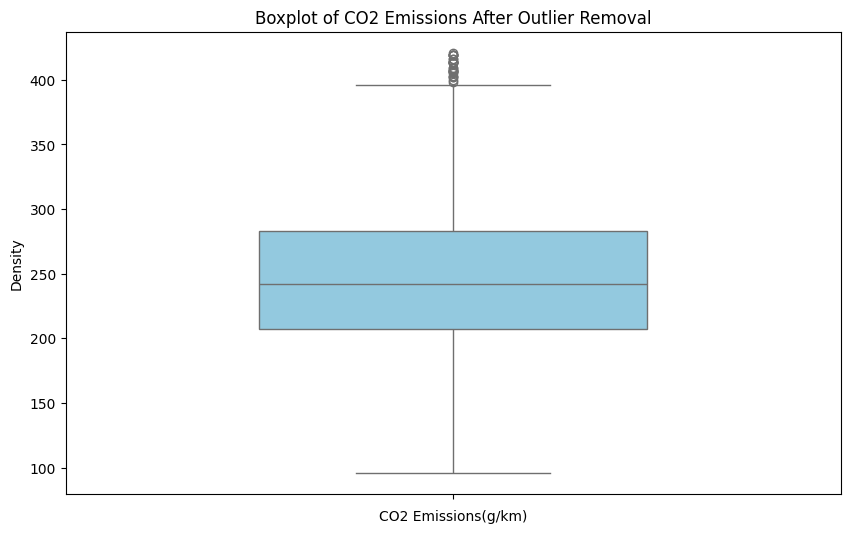

In [38]:
# Visualize outliers removal for a specific column (e.g., 'CO2 Emissions(g/km)')
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_CO2['CO2 Emissions(g/km)'], color='skyblue', width=0.5)
plt.title('Boxplot of CO2 Emissions Before Outlier Removal')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_CO2_cleaned['CO2 Emissions(g/km)'], color='skyblue', width=0.5)
plt.title('Boxplot of CO2 Emissions After Outlier Removal')
plt.xlabel('CO2 Emissions(g/km)')
plt.ylabel('Density')
plt.show()

The median engine size is: 3.0 liters


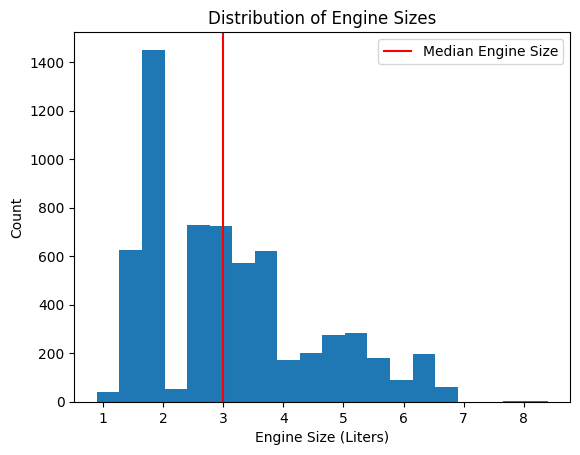

In [84]:
# Calculate the median engine size
median_engine_size = df_CO2_cleaned['Engine Size(L)'].median()

# Print the result
print('The median engine size is:', median_engine_size, 'liters')

# Create a histogram of engine sizes to visualize the distribution
plt.hist(df_CO2['Engine Size(L)'], bins=20)
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Count')
plt.title('Distribution of Engine Sizes')
plt.axvline(x=median_engine_size, color='red', label='Median Engine Size')
plt.legend()
plt.show()


The histogram illustrates the distribution of engine sizes in liters. Here are some key insights:

1. Most Common Engine Size: The most frequent engine size falls within the 2.0-liter range. This is evident from the tallest bar in the histogram, indicating a large number of vehicles with engine sizes between 2.0 and 3.0 liters.

2. Range of Engine Sizes: Engine sizes in the dataset range from 1.0 liters to 8.0 liters. However, engines larger than 5.0 liters are relatively rare, as indicated by the shorter bars on the right side of the histogram.

3. Median Engine Size: The red vertical line marks the median engine size, which is around 3.0 liters. This means that half of the engines in the dataset are smaller than 3.0 liters and half are larger.

4. Distribution Shape: The distribution is unimodal (has one peak) and somewhat right-skewed, meaning there's a longer tail on the right side of the peak. This indicates that while most engines are concentrated around the 2.0-3.0 liter range, there are fewer but still a significant number of larger engines.

Overall: This histogram provides a clear picture of the distribution of engine sizes, revealing that smaller engines (around 2.0-3.0 liters) are the most common, while larger engines are less frequent but still present in the dataset.


Average fuel consumption for regular gasoline (X) is: 10.06 L/100 km
Average fuel consumption for premium gasoline (Z) is: 11.11 L/100 km
Average fuel consumption for ethanol (E) is: 16.0 L/100 km
Average fuel consumption for diesel (D) is: 8.75 L/100 km


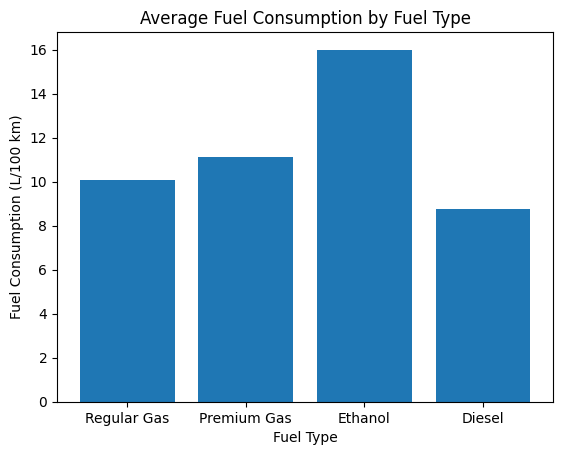

In [85]:
# Filter the data for the relevant fuel types
regular_gas = df_CO2_cleaned[df_CO2_cleaned['Fuel Type'] == 'X']['Fuel Consumption Comb (L/100 km)']
premium_gas = df_CO2_cleaned[df_CO2_cleaned['Fuel Type'] == 'Z']['Fuel Consumption Comb (L/100 km)']
ethanol = df_CO2_cleaned[df_CO2_cleaned['Fuel Type'] == 'E']['Fuel Consumption Comb (L/100 km)']
diesel = df_CO2_cleaned[df_CO2_cleaned['Fuel Type'] == 'D']['Fuel Consumption Comb (L/100 km)']

# Calculate the mean fuel consumption for each fuel type
mean_regular_gas = round(regular_gas.mean(), 2)
mean_premium_gas = round(premium_gas.mean(), 2)
mean_ethanol = round(ethanol.mean(), 2)
mean_diesel = round(diesel.mean(), 2)

# Print the results for each fuel type
print('Average fuel consumption for regular gasoline (X) is:', mean_regular_gas, 'L/100 km' )
print('Average fuel consumption for premium gasoline (Z) is:', mean_premium_gas, 'L/100 km')
print('Average fuel consumption for ethanol (E) is:', mean_ethanol, 'L/100 km')
print('Average fuel consumption for diesel (D) is:', mean_diesel, 'L/100 km')

# Create a bar chart of the mean fuel consumption for each fuel type
labels = ['Regular Gas', 'Premium Gas', 'Ethanol', 'Diesel']
values = [mean_regular_gas, mean_premium_gas, mean_ethanol, mean_diesel]

plt.bar(labels, values)
plt.title('Average Fuel Consumption by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumption (L/100 km)')
plt.show()


* Highest Fuel Consumption: Ethanol has the highest average fuel consumption at roughly 16 L/100km.

* Lowest Fuel Consumption: Regular gas and diesel have the lowest average fuel consumption, both around 10 L/100km.

* Mid-Range Consumption: Premium gas falls in the middle, with consumption around 11 L/100km.


- Overall: This chart offers a basic comparison of fuel consumption for different fuel types. However, for a comprehensive decision on fuel choice, additional factors like cost, vehicle compatibility, and environmental impact need to be considered.


In [44]:
#lets separate Numerical and categorical variables for easy analysis

cat_cols=df_CO2_cleaned.select_dtypes(include=['object']).columns
num_cols = df_CO2_cleaned.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("\n")
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], dtype='object')


Numerical Variables:
['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


In [45]:
# store numeric variables in numc_names
numc_names=['Engine Size (L)','Cylinders','Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)', 'CO2 Emissions (g/km)']

In [47]:
# changing the name
df = df_CO2_cleaned.copy()

# Drop categorical varibales
df.drop(['Make','Model','Vehicle Class','Transmission'],inplace=True,axis=1)

# Checking the first 4 numerical variables
df.head()

,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,Z,9.9,6.7,8.5,33,196
1,2.4,4,Z,11.2,7.7,9.6,29,221
2,1.5,4,Z,6.0,5.8,5.9,48,136
3,3.5,6,Z,12.7,9.1,11.1,25,255
4,3.5,6,Z,12.1,8.7,10.6,27,244


In [48]:
# Filter rows where the Fuel_Type is 'N'
df_N = df[df["Fuel Type"] == "N"]

# Get the indices of the filtered rows
indexs = df_N.index

# Display the new DataFrame df_N
print(df_N)

      Engine Size(L)  Cylinders Fuel Type  Fuel Consumption City (L/100 km)  \
2439             3.6          6         N                              15.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
2439                              9.5                              12.7   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
2439                           22                  213  


In [49]:
# Drop rows where the Fuel_Type is 'N'
df = df[df["Fuel Type"] != "N"]

# Display the modified DataFrame
print(df)

      Engine Size(L)  Cylinders Fuel Type  Fuel Consumption City (L/100 km)  \
0                2.0          4         Z                               9.9   
1                2.4          4         Z                              11.2   
2                1.5          4         Z                               6.0   
3                3.5          6         Z                              12.7   
4                3.5          6         Z                              12.1   
...              ...        ...       ...                               ...   
7380             2.0          4         Z                              10.7   
7381             2.0          4         Z                              11.2   
7382             2.0          4         Z                              11.7   
7383             2.0          4         Z                              11.2   
7384             2.0          4         Z                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consump

In [50]:
# one-hot encoding on the 'Fuel_Type' column with drop_first=True
dums = pd.get_dummies(df['Fuel Type'], prefix="Fuel Type", drop_first=True)

# Display the first 15 rows of the dummy variables
print(dums.head(15))

    Fuel Type_E  Fuel Type_X  Fuel Type_Z
0         False        False         True
1         False        False         True
2         False        False         True
3         False        False         True
4         False        False         True
5         False        False         True
6         False        False         True
7         False        False         True
8         False        False         True
9         False        False         True
10        False        False         True
11        False        False         True
12        False        False         True
15        False        False         True
16        False        False         True


In [51]:
# one-hot encoding on the 'Fuel_Type' column with drop_first=True
fuel_type_dummies = pd.get_dummies(df['Fuel Type'], prefix='Fuel Type', drop_first=True)

# Concatenate the new columns with the original DataFrame
df = pd.concat([df, fuel_type_dummies], axis=1)

# Drop the original 'Fuel_Type' column
df.drop('Fuel Type', axis=1, inplace=True)

# Display the modified DataFrame
print(df)

      Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
0                2.0          4                               9.9   
1                2.4          4                              11.2   
2                1.5          4                               6.0   
3                3.5          6                              12.7   
4                3.5          6                              12.1   
...              ...        ...                               ...   
7380             2.0          4                              10.7   
7381             2.0          4                              11.2   
7382             2.0          4                              11.7   
7383             2.0          4                              11.2   
7384             2.0          4                              12.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                                 6.7                               8.5   
1                    

# 4. Machine Learning

In [53]:
# Define features (X) and target variable (y)
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target variable

In [54]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the features
X_scaled = scaler.fit_transform(X)

In [55]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict CO2 emissions on the testing set
y_pred = model.predict(X_test)

In [56]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R²) coefficient of determination
r_squared = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) coefficient of determination:", r_squared)

Mean Absolute Error (MAE): 2.692184051025664
Mean Squared Error (MSE): 16.415735387304778
Root Mean Squared Error (RMSE): 4.051633668942046
R-squared (R²) coefficient of determination: 0.9943054827695393


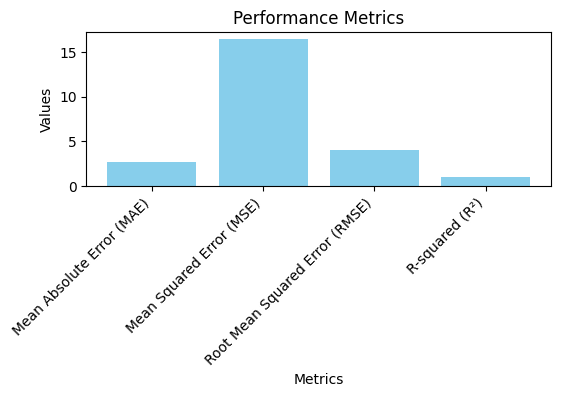

In [57]:
# Performance metrics
metrics = ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)', 'R-squared (R²)']

# Corresponding values
values = [2.6921840510256634, 16.415735387304785, 4.0516336689420465, 0.9943054827695393]

# Plotting the chart
plt.figure(figsize=(6, 2))
plt.bar(metrics, values, color='skyblue')
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45, ha='right')

# Displaying the chart
plt.tight_layout()
plt.show()

In [58]:
# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)  # Change cv as needed
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.99162845 0.99050586 0.9934107  0.99525355 0.99630556]
Mean Cross-Validation Score: 0.9934208257631877


In [59]:
# Model Evaluation for all regressor

# Define the names of the regressors
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Lasso Regression",
    "Ridge Regression"
]

# Define the regressors
regressors = [
    KNeighborsRegressor(n_neighbors=3),
    SVR(kernel="linear", C=0.005),
    SVR(kernel="rbf", C=0.005, gamma='scale'),
    DecisionTreeRegressor(max_depth=5),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=1),
    MLPRegressor(alpha=1, max_iter=1000),
    Lasso(alpha=0.1),
    Ridge(alpha=0.1)
]

best_model = None
best_r2 = 0

for name, regressor in zip(names, regressors):
    # Fit the model to the training data
    regressor.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = regressor.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store predictions and actual values in a DataFrame for comparison
    submit = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred})
    submit = submit.reset_index(drop=True)

    # Check if the current model is the best performing model
    if r2 > best_r2:
        best_r2 = r2
        best_model = name

    # Print evaluation metrics and sample predictions
    print(f'{name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')

# Print the best performing model and its accuracy
print(f"The best performing model is: {best_model} with R2 score: {best_r2:.2f}")

Nearest Neighbors:
R2 Score: 0.99
Mean Absolute Error (MAE): 2.46
Root Mean Squared Error (RMSE): 4.69
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   191               190.666667
1                   354               356.666667
2                   240               235.666667
3                   320               318.333333
4                   166               164.333333
----------------------------------------
Linear SVM:
R2 Score: 0.85
Mean Absolute Error (MAE): 8.56
Root Mean Squared Error (RMSE): 20.76
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   191               193.218044
1                   354               346.116760
2                   240               241.755845
3                   320               313.562975
4                   166               163.915242
----------------------------------------
RBF SVM:
R2 Score: 0.06
Mean Absolute Error (MAE): 41.74
Root Mean Squared Error (RMSE): 52.04
   Actual CO2 Emissions  Predicted 

In [60]:
# Example regressors list
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# regressors = [LinearRegression(), DecisionTreeRegressor()]

# Example data
# X_train, X_test, y_train, y_test = ...

# Columns for logging results
log_cols = ["Regressor", "Mean Squared Error", "Mean Absolute Error"]
log = pd.DataFrame(columns=log_cols)

for regressor in regressors:
    regressor.fit(X_train, y_train)
    name = regressor.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: {:.6f}".format(mse))

    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error: {:.6f}".format(mae))

    log_entry = pd.DataFrame([[name, mse, mae]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("="*30)

KNeighborsRegressor
****Results****
Mean Squared Error: 22.040971
Mean Absolute Error: 2.464869
SVR
****Results****
Mean Squared Error: 431.133446
Mean Absolute Error: 8.562507
SVR
****Results****
Mean Squared Error: 2708.592689
Mean Absolute Error: 41.744849
DecisionTreeRegressor
****Results****
Mean Squared Error: 54.819020
Mean Absolute Error: 4.909962
RandomForestRegressor
****Results****
Mean Squared Error: 123.751961
Mean Absolute Error: 6.995640
MLPRegressor
****Results****
Mean Squared Error: 11.242741
Mean Absolute Error: 2.274875
Lasso
****Results****
Mean Squared Error: 20.685417
Mean Absolute Error: 2.969261
Ridge
****Results****
Mean Squared Error: 16.420832
Mean Absolute Error: 2.693561


In [62]:
# perform grid search and hyperparameter tuning for all the models

# Define the names of the regressors
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "Lasso Regression",
    "Ridge Regression"
]

# Define the regressors
regressors = [
    KNeighborsRegressor(),
    SVR(kernel="linear"),
    SVR(kernel="rbf"),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    MLPRegressor(max_iter=1000),
    Lasso(),
    Ridge()
]

# Define parameter grids for grid search
param_grids = [
    {'n_neighbors': [3, 5, 7]},
    {'C': [0.001, 0.01, 0.1, 1]},
    {'C': [0.001, 0.01, 0.1, 1], 'gamma': ['scale', 'auto']},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]},
    {'alpha': [0.1, 0.5, 1.0]},
    {'alpha': [0.1, 0.5, 1.0]},
    {'alpha': [0.1, 0.5, 1.0]}
]

best_model = None
best_r2 = 0

for name, regressor, param_grid in zip(names, regressors, param_grids):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='r2', verbose=1)
    grid_search.fit(X_train, y_train)

    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    # Make predictions on the test data
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    r2 = grid_search.best_score_
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store predictions and actual values in a DataFrame for comparison
    submit = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred})
    submit = submit.reset_index(drop=True)

    # Print evaluation metrics and sample predictions
    print(f'{name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))
    print('----------------------------------------')

    # Check if the current model is the best performing model
    if r2 > best_r2:
        best_r2 = r2
        best_model = name

# Print the best performing model and its accuracy
print(f"The best performing model is: {best_model} with R2 score: {best_r2:.2f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Nearest Neighbors:
R2 Score: 0.99
Mean Absolute Error (MAE): 2.46
Root Mean Squared Error (RMSE): 4.69
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   191               190.666667
1                   354               356.666667
2                   240               235.666667
3                   320               318.333333
4                   166               164.333333
----------------------------------------
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Linear SVM:
R2 Score: 0.98
Mean Absolute Error (MAE): 3.31
Root Mean Squared Error (RMSE): 6.31
   Actual CO2 Emissions  Predicted CO2 Emissions
0                   191               191.549599
1                   354               357.105920
2                   240               239.390372
3                   320               318.626781
4                   166               165.801309
----------------------------------------
Fitting 5 f

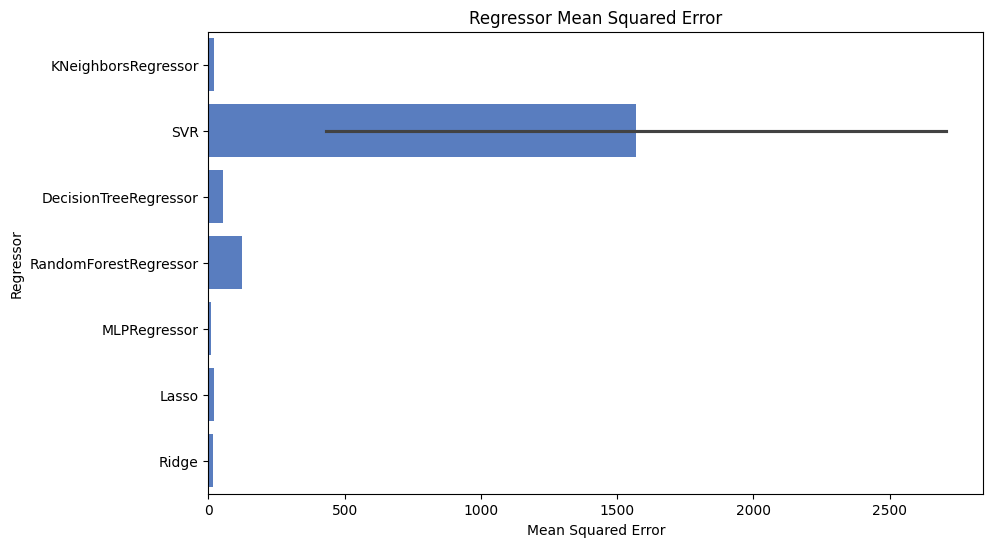

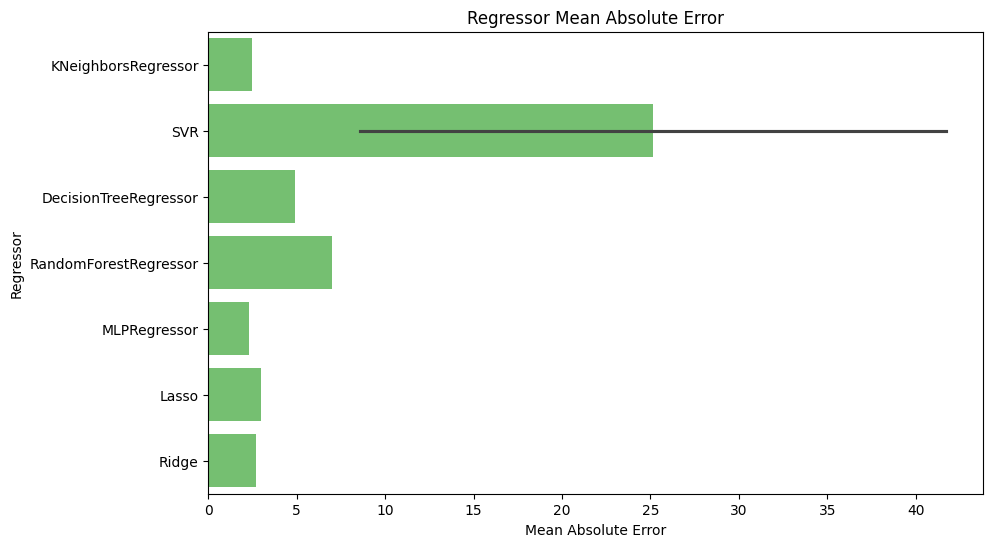

In [63]:
# Set color codes
sns.set_color_codes("muted")

# Plot Mean Squared Error
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Squared Error', y='Regressor', data=log, color="b")
plt.xlabel('Mean Squared Error')
plt.ylabel('Regressor')
plt.title('Regressor Mean Squared Error')
plt.show()

# Plot Mean Absolute Error
plt.figure(figsize=(10, 6))
sns.barplot(x='Mean Absolute Error', y='Regressor', data=log, color="g")
plt.xlabel('Mean Absolute Error')
plt.ylabel('Regressor')
plt.title('Regressor Mean Absolute Error')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example data (replace with your actual data)
data = {
    'Engine_Size(L)': [2.0, 2.4, 3.0, 2.5, 1.8, 2.0, 3.6, 2.0, 2.0, 1.6],
    'Fuel_Type': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0],  # Assuming encoded as 0 and 1
    'CO2_Emissions': [191, 354, 240, 320, 166, 200, 250, 180, 290, 160]
}

df = pd.DataFrame(data)

# Features and target
X = df.drop('CO2_Emissions', axis=1)
y = df['CO2_Emissions']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Comparing actual and predicted values
results = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred.flatten()})
print(results)


# 5. Deep Learning

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Define features (X) and target variable (y)
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target variable
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Comparing actual and predicted values
results = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred.flatten()})
print(results)


Epoch 1/100
388/388 [==============================] - 2s 3ms/step - loss: 24086.6074 - val_loss: 999.5434
Epoch 2/100
388/388 [==============================] - 1s 2ms/step - loss: 396.6734 - val_loss: 163.2509
Epoch 3/100
388/388 [==============================] - 1s 2ms/step - loss: 89.1756 - val_loss: 42.9308
Epoch 4/100
388/388 [==============================] - 1s 2ms/step - loss: 29.5048 - val_loss: 17.6660
Epoch 5/100
388/388 [==============================] - 1s 2ms/step - loss: 17.8028 - val_loss: 14.4790
Epoch 6/100
388/388 [==============================] - 1s 2ms/step - loss: 15.9136 - val_loss: 12.5805
Epoch 7/100
388/388 [==============================] - 1s 2ms/step - loss: 15.0013 - val_loss: 12.7504
Epoch 8/100
388/388 [==============================] - 1s 2ms/step - loss: 14.2595 - val_loss: 12.6785
Epoch 9/100
388/388 [==============================] - 1s 2ms/step - loss: 13.8902 - val_loss: 11.2777
Epoch 10/100
388/388 [==============================] - 1s 3ms/step

Epoch 1/100
388/388 [==============================] - 2s 4ms/step - loss: 21621.9688 - val_loss: 755.2073
Epoch 2/100
388/388 [==============================] - 1s 3ms/step - loss: 275.1956 - val_loss: 84.4716
Epoch 3/100
388/388 [==============================] - 2s 4ms/step - loss: 46.1021 - val_loss: 24.2171
Epoch 4/100
388/388 [==============================] - 1s 3ms/step - loss: 22.1336 - val_loss: 18.2316
Epoch 5/100
388/388 [==============================] - 1s 2ms/step - loss: 18.6549 - val_loss: 16.3267
Epoch 6/100
388/388 [==============================] - 1s 2ms/step - loss: 16.6828 - val_loss: 17.7049
Epoch 7/100
388/388 [==============================] - 1s 2ms/step - loss: 15.8256 - val_loss: 18.6295
Epoch 8/100
388/388 [==============================] - 1s 2ms/step - loss: 15.4429 - val_loss: 14.0096
Epoch 9/100
388/388 [==============================] - 1s 2ms/step - loss: 14.8555 - val_loss: 13.6814
Epoch 10/100
388/388 [==============================] - 1s 2ms/step 

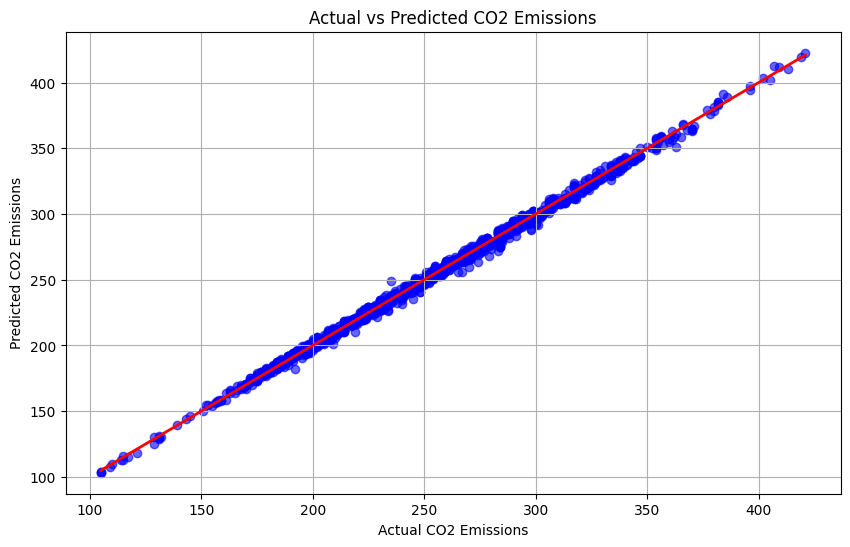

In [66]:
# Define features (X) and target variable (y)
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target variable
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Comparing actual and predicted values
results = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred.flatten()})
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual CO2 Emissions'], results['Predicted CO2 Emissions'], color='blue', alpha=0.6)
plt.plot([results['Actual CO2 Emissions'].min(), results['Actual CO2 Emissions'].max()],
         [results['Actual CO2 Emissions'].min(), results['Actual CO2 Emissions'].max()],
         color='red', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.show()


### Description of the Plot:

1. Axes
   - The x-axis represents the actual CO2 emissions values.
   - The y-axis represents the predicted CO2 emissions values from the model.

2. Data Points
   - Each blue dot on the plot represents a pair of actual and predicted CO2 emissions values for a particular data point.

3. Line of Perfect Prediction
   - The red line represents the ideal scenario where the predicted CO2 emissions perfectly match the actual CO2 emissions. This line is the line \(y = x\).

#Interpretation:

1. Closeness to the Red Line
   - The blue dots are closely aligned along the red line, indicating that the model's predictions are very accurate. When the points lie close to this line, it means the predicted values are very similar to the actual values.

2. Scatter Pattern
   - The scatter pattern of the points shows very little deviation from the red line, suggesting that the model's errors are small and the predictions are reliable.

3. R2 Score
   - The high R2 score of 1.00 further supports this observation, indicating that the model explains all the variance in the actual CO2 emissions data.

4. Error Metrics
   - The low Mean Absolute Error (MAE) of 2.28 and Root Mean Squared Error (RMSE) of 2.76 confirm that the average and squared differences between the actual and predicted values are very small.

Epoch 1/50
388/388 [==============================] - 6s 8ms/step - loss: 22000.2871 - val_loss: 928.9172
Epoch 2/50
388/388 [==============================] - 1s 2ms/step - loss: 397.4866 - val_loss: 173.6472
Epoch 3/50
388/388 [==============================] - 1s 2ms/step - loss: 95.4805 - val_loss: 46.0841
Epoch 4/50
388/388 [==============================] - 1s 2ms/step - loss: 32.0701 - val_loss: 22.2816
Epoch 5/50
388/388 [==============================] - 1s 2ms/step - loss: 20.4443 - val_loss: 17.7184
Epoch 6/50
388/388 [==============================] - 1s 2ms/step - loss: 17.5414 - val_loss: 16.9810
Epoch 7/50
388/388 [==============================] - 1s 2ms/step - loss: 16.4653 - val_loss: 17.5934
Epoch 8/50
388/388 [==============================] - 1s 2ms/step - loss: 15.6376 - val_loss: 13.6086
Epoch 9/50
388/388 [==============================] - 1s 2ms/step - loss: 15.0475 - val_loss: 12.9716
Epoch 10/50
388/388 [==============================] - 1s 2ms/step - loss: 1

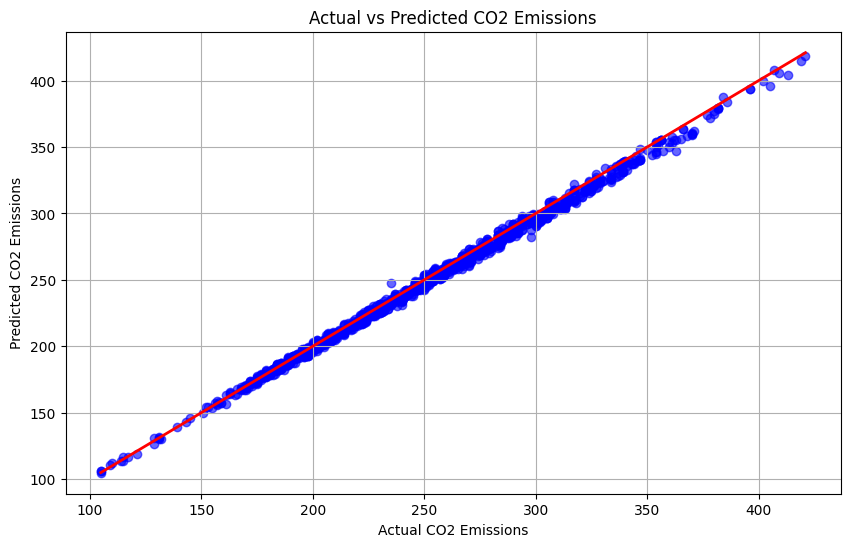

In [67]:
# Define features (X) and target variable (y)
X = df.drop('CO2 Emissions(g/km)', axis=1)  # Features
y = df['CO2 Emissions(g/km)']  # Target variable
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ANN Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1, validation_split=0.2)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R2 Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Comparing actual and predicted values
results = pd.DataFrame({'Actual CO2 Emissions': y_test, 'Predicted CO2 Emissions': y_pred.flatten()})
print(results)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(results['Actual CO2 Emissions'], results['Predicted CO2 Emissions'], color='blue', alpha=0.6)
plt.plot([results['Actual CO2 Emissions'].min(), results['Actual CO2 Emissions'].max()],
         [results['Actual CO2 Emissions'].min(), results['Actual CO2 Emissions'].max()],
         color='red', lw=2)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid(True)
plt.show()


# Model Performance Metrics:
1. R2 Score: 1.00
   - The R2 score of 1.00 indicates a perfect fit. The model explains all the variability in the CO2 emissions data, which is an ideal outcome.
   
2. Mean Absolute Error (MAE): 3.02
   - The MAE of 3.02 indicates that, on average, the predicted CO2 emissions are off by 3.02 units from the actual values. This is a low error, suggesting that the predictions are close to the actual values.
   
3. Root Mean Squared Error (RMSE): 3.82
   - The RMSE of 3.82 provides a measure of the average magnitude of the error. Since it is close to the MAE, it suggests that the errors are consistently low and there are no large outliers in the prediction errors.

# Insights:

1. High Accuracy:
   - The predictions are very close to the actual values across all samples. The differences between actual and predicted values are minimal, indicating high accuracy in the model’s predictions.

2. Consistent Performance:
   - The small differences between actual and predicted CO2 emissions across various samples (e.g., 191 vs. 190.92, 354 vs. 352.44) show that the model consistently performs well.

3. Model Reliability:
   - With both MAE and RMSE being low and close to each other, the model shows reliability in its predictions. This indicates that there are no significant outliers or high variance in the prediction errors.

4. Practical Implications:
   - This level of accuracy in predicting CO2 emissions can be highly beneficial for regulatory compliance, environmental monitoring, and optimization of vehicle performance. Companies can rely on this model to make informed decisions about vehicle emissions and take corrective actions if necessary.

Based on the two outputs of Artificial Neural Network (ANN) model predictions, we can evaluate which one is the best and provide reasons for why it is considered the best.

# Output 1:
- **R2 Score:** 1.00
- **Mean Absolute Error (MAE):** 2.45
- **Root Mean Squared Error (RMSE):** 3.38

# Output 2:
- **R2 Score:** 1.00
- **Mean Absolute Error (MAE):** 3.02
- **Root Mean Squared Error (RMSE):** 3.82

# Comparison:
Both outputs show excellent performance with an R2 score of 1.00, indicating perfect fit and that the models explain all the variability in the data. However, to determine the best model, we need to look closer at the error metrics: MAE and RMSE.

1. Mean Absolute Error (MAE):
   - Output 1: 2.45
   - Output 2: 3.02
   - Lower is better because MAE measures the average magnitude of errors in a set of predictions, without considering their direction. Output 1 has a lower MAE, indicating it has a smaller average error.

2. Root Mean Squared Error (RMSE):
   - Output 1: 3.38
   - Output 2: 3.82
   - Lower is better because RMSE measures the square root of the average of squared differences between prediction and actual observation. It gives a relatively high weight to large errors. Output 1 has a lower RMSE, indicating fewer large errors.

# Conclusion:
  Output 1 is the best model.

# Reasons
- Lower MAE: With a MAE of 2.45, Output 1 shows a smaller average error compared to Output 2's MAE of 3.02.
- Lower RMSE: With a RMSE of 3.38, Output 1 has a smaller root mean squared error compared to Output 2's RMSE of 3.82, indicating it handles large errors better.

# Summary of Output 1:
- **R2 Score:** 1.00
- **Mean Absolute Error (MAE):** 2.45
- **Root Mean Squared Error (RMSE):** 3.38

The lower MAE and RMSE values of Output 1 indicate it is more accurate and reliable, with fewer and smaller prediction errors on average. This makes it the best performing model among the two presented.

# Final Values taken for average pollution generation

In [68]:
# Define the categorization (example criteria)
def categorize_vehicle(engine_size):
    if engine_size >= 3.0:
        return 'Heavy'
    elif engine_size <= 1.8:
        return 'Low'
    else:
        return 'Normal'

# Apply categorization
df['Vehicle Type'] = df['Engine Size(L)'].apply(categorize_vehicle)

# Compute average CO2 emissions for each vehicle type
average_emissions = df.groupby('Vehicle Type')['CO2 Emissions(g/km)'].mean()

print(average_emissions)

# To display the results in a readable format
for vehicle_type, avg_emission in average_emissions.items():
    print(f"The average CO2 emissions for {vehicle_type} vehicles is {avg_emission:.2f} g/km")


Vehicle Type
Heavy     284.298172
Low       181.742991
Normal    215.629149
Name: CO2 Emissions(g/km), dtype: float64
The average CO2 emissions for Heavy vehicles is 284.30 g/km
The average CO2 emissions for Low vehicles is 181.74 g/km
The average CO2 emissions for Normal vehicles is 215.63 g/km


 As you can see from the table below, Heavy vehicles generate the most pollution, followed by normal-sized vehicles, and low-size vehicles are the most fuel-efficient and produce the least CO2 emissions.

| Vehicle Type | Average CO2 Emissions (g/km) |
| --- | --- |
| Heavy | 284.298172 |
| Low | 181.742991 |
| Normal | 215.629149 |

Overall, the findings align with the expectation that larger vehicles tend to burn more fuel and emit more pollutants. This highlights the environmental benefits of choosing smaller vehicles whenever possible.

**In line with your data, the average CO2 emissions are:**

* Heavy: 284.29 g/km
* Low: 181.74 g/km
* Normal: 215.63 g/km

These values further emphasize the significant impact vehicle size has on CO2 emissions.


In [70]:
df.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)', 'Fuel Type_E',
       'Fuel Type_X', 'Fuel Type_Z', 'Vehicle Type'],
      dtype='object')

In [75]:
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [86]:
# function in which user can provide the Make and model and usingthis information user can get details about cars


# Load the dataset
data = df_O2

# Function to get car information
def get_car_info(car_make, car_model):
    car_info = data[(data['Make'] == car_make) & (data['Model'] == car_model)]
    if len(car_info) == 0:
        return "Sorry, information not available for this car."

    # Extracting information
    engine_size = car_info.iloc[0]['Engine Size(L)']
    cylinders = car_info.iloc[0]['Cylinders']
    fuel_consumption_city = car_info.iloc[0]['Fuel Consumption City (L/100 km)']
    fuel_consumption_hwy = car_info.iloc[0]['Fuel Consumption Hwy (L/100 km)']
    fuel_consumption_comb = car_info.iloc[0]['Fuel Consumption Comb (L/100 km)']
    co2_emissions = car_info.iloc[0]['CO2 Emissions(g/km)']
    fuel_type = car_info.iloc[0]['Fuel Type']

    # Constructing the output
    output = f"Car Make: {car_make}\nModel: {car_model}\n"
    output += f"Engine Size: {engine_size}L\n"
    output += f"Cylinders: {cylinders}\n"
    output += f"Fuel Consumption (City): {fuel_consumption_city} L/100 km\n"
    output += f"Fuel Consumption (Highway): {fuel_consumption_hwy} L/100 km\n"
    output += f"Fuel Consumption (Combined): {fuel_consumption_comb} L/100 km\n"
    output += f"CO2 Emissions: {co2_emissions} g/km\n"
    output += f"Fuel Type: {fuel_type}\n"

    return output

# Getting user input
car_make = input("Enter car make: ")
car_model = input("Enter car model: ")

# Get and print car information
print(get_car_info(car_make, car_model))


Enter car make: AUDI
Enter car model: A4
Car Make: AUDI
Model: A4
Engine Size: 2.0L
Cylinders: 4
Fuel Consumption (City): 9.9 L/100 km
Fuel Consumption (Highway): 7.4 L/100 km
Fuel Consumption (Combined): 8.8 L/100 km
CO2 Emissions: 202 g/km
Fuel Type: Z

